# Christian Frago
# BDAT 1004 - Problem Set 3


## Question 1 Introduction

In [2]:
import pandas as pd

# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address ("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user").
# Step 3. Assign it to a variable called users
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
# Step 4. Discover what is the mean age per occupation
mean_age_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_age_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [12]:
#Step 5. Discover the Male ratio per occupation and sort it from the most to the least
total_male = users.groupby('occupation').male.sum()
total_gender = users.groupby('occupation').gender.count()
male_ratio = (total_male/total_gender).sort_values(ascending = False).round(2)
male_ratio

occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [13]:
# Step 6. For each occupation, calculate the minimum and maximum ages
ages_calc = users.groupby('occupation').agg({'age': ['min','max']})
ages_calc

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [14]:
# Step 7. For each combination of occupation and sex, calculate the mean age
mean_age = users.groupby(['occupation','gender']).agg({'age': ['mean']})
mean_age

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [16]:
# Step 8. For each occupation present the percentage of women and men
w_m_percent = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
w_m_percent

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889



## Question 2 Euro Teams

In [17]:
# Euro Teams
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address (https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv)
# Step 3. Assign it to a variable called euro12
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [19]:
# Step 4. Select only the Goal column
goal = euro12['Goals']
goal

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [20]:
# Step 5. How many team participated in the Euro2012?
teams = euro12['Team'].count()
teams

16

In [21]:
# Step 6. What is the number of columns in the dataset?
column_count = len(euro12.columns)
column_count

35

In [22]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [23]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
team_sort = discipline.sort_values(['Red Cards','Yellow Cards'])
team_sort

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [24]:
# Step 9. Calculate the mean Yellow Cards given per Team
y_cards_mean = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
y_cards_mean

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [26]:
# Step 10. Filter teams that scored more than 6 goals
team_goals = euro12[['Team','Goals']]
goal_6 = team_goals[team_goals['Goals']  > 6]
goal_6

,Team,Goals
5,Germany,10
13,Spain,12


In [27]:
# Step 11. Select the teams that start with G
teams_names = euro12['Team']
g_name = teams_names[teams_names.str.startswith("G")]
g_name

5    Germany
6     Greece
Name: Team, dtype: object

In [28]:
# Step 12. Select the first 7 columns
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [29]:
# Step 13. Select all columns except the last 3
euro12.iloc[:, list(range(32))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [31]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
shoot_acc = euro12[['Team','Shooting Accuracy']]
selected_acc = shoot_acc.loc[shoot_acc.Team.isin(['England','Italy','Russia'])]
selected_acc

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%



## Question 3 Housing

In [96]:
# Step 1. Import the necessary libraries
import random

In [97]:
#Step 2. Create 3 differents Series, each of length 100, as follows:
#     • The first a random number from 1 to 4
#     • The second a random number from 1 to 3
#     • The third a random number from 10,000 to 30,000

Series1,Series2,Series3 = [],[],[]

#Step 3. Create a DataFrame by joinning the Series by column
for i in range(0,100):
    Series1.append(random.randint(1,4))
    Series2.append(random.randint(1,3))
    Series3.append(random.randint(10000,30000))

data = {'Series1' : Series1,'Series2':Series2,'Series3':col3}
df = pd.DataFrame(data)
df.head()  #showing only the top data

,Series1,Series2,Series3
0,1,2,23799
1,3,1,17408
2,2,2,17733
3,2,2,15337
4,2,3,25384


In [98]:
#Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
df.rename(columns = {'Series1': 'bedrs', 'Series2': 'bathrs','Series3':'price_sqr_meter'}, inplace = True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,2,23799
1,3,1,17408
2,2,2,17733
3,2,2,15337
4,2,3,25384


In [99]:
#Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
total_col = Series1+Series2+Series3
df['bigcolumn'] = total_col
df  ## expected Error here!!!

ValueError: Length of values (300) does not match length of index (100)

In [ ]:
# Step 6. Ops it seems it is going only until index 99. Is it true?
## Answr: YES, as per error message ValueError: Length of values (300) does not match length of index (100)

In [100]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
df = df.reset_index(drop=True).reindex(range(300))
df

,bedrs,bathrs,price_sqr_meter
0,1.0,2.0,23799.0
1,3.0,1.0,17408.0
2,2.0,2.0,17733.0
3,2.0,2.0,15337.0
4,2.0,3.0,25384.0
...,...,...,...
295,NaN,NaN,NaN
296,NaN,NaN,NaN
297,NaN,NaN,NaN
298,NaN,NaN,NaN



## Question 4 Wind Statistics

In [79]:
#Step 1. Import the necessary libraries
#Step 2. Import the dataset from the attached file wind.txt
data = pd.read_csv("wind.txt", sep='\s+')
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [80]:
#Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data["DateTime"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


In [81]:
#Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
# Subtract 100 years from the DateTime column where year is greater than or equal to 61
data.loc[data['DateTime'].dt.year >= 2061, 'DateTime'] -= pd.DateOffset(years=100)

# Drop the original Yr, Mo, and Dy columns
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)

# Show the updated DataFrame
print(data.head())

     RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL    CLO    BEL  \
0  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83  12.58  18.50   
1  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   9.67  17.54   
2  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   7.67  12.75   
3  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   5.88   5.46   
4  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92  10.34  12.92   

     MAL   DateTime  
0  15.04 1961-01-01  
1  13.83 1961-01-02  
2  12.71 1961-01-03  
3  10.88 1961-01-04  
4  11.83 1961-01-05  


In [82]:
#Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
data.set_index("DateTime", inplace=True)

In [83]:
#Step 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.
missing_values = data.isnull().sum()
print(missing_values)

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [84]:
#Step 7. Compute how many non-missing values there are in total.
total_non_missing = data.count().sum()
print(total_non_missing)

78857


In [85]:
#Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#A single number for the entire dataset.
mean_windspeeds = data.mean().mean()
print(mean_windspeeds)

10.227982360836924


In [88]:
#Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days
#A different set of numbers for each location.
import numpy as np

loc_stats = data.iloc[:, :-1].agg(['min', 'max', 'mean', 'std']).T
loc_stats.columns = ['Min', 'Max', 'Mean', 'Std']
print(loc_stats)

      Min    Max       Mean       Std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037


In [89]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
#A different set of numbers for each day.
day_stats = data.iloc[:, :-1].agg(['min', 'max', 'mean', 'std'], axis=1)
print(day_stats)

             min    max       mean       std
DateTime                                    
1961-01-01  9.29  18.50  12.816000  2.875205
1961-01-02  6.50  17.54  11.087000  3.246482
1961-01-03  6.17  18.50  11.535000  3.863068
1961-01-04  1.79  11.75   6.231818  3.044716
1961-01-05  6.17  13.33  10.520909  2.533900
...          ...    ...        ...       ...
1978-12-27  8.08  17.62  14.583636  2.916852
1978-12-28  5.00  21.79  12.758182  5.265504
1978-12-29  8.71  19.17  13.554545  3.593590
1978-12-30  9.13  21.29  14.147273  3.756578
1978-12-31  9.59  27.29  14.795455  5.559306

[6574 rows x 4 columns]


In [90]:
#Step 11. Find the average windspeed in January for each location.
#Treat January 1961 and January 1962 both as January.

jan_mask = (data.index.month == 1)
jan_data = data[jan_mask]
jan_means = jan_data.mean()

print(jan_means)

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [92]:
#Step 12. Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('Y').mean()
print(yearly_data)

                  RPT        VAL        ROS       KIL        SHA       BIR  \
DateTime                                                                     
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [93]:
#Step 13. Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()
print(monthly_data)

                  RPT        VAL        ROS       KIL        SHA        BIR  \
DateTime                                                                      
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [94]:
#Step 14. Downsample the record to a weekly frequency for each location.
weekly_data = data.resample('W').mean()
print(weekly_data)

                  RPT        VAL        ROS        KIL        SHA        BIR  \
DateTime                                                                       
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [95]:
#Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.
weekly_data = data.loc['1961-01-02':'1961-12-31'].resample('W').agg(['min', 'max', 'mean', 'std'])
weekly_data.head(52)


RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
DateTime                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   
1961-03-19   4.92  16.88  11.911429  3.860036   9.46  15.54  13.501429   
1961-03-26   6.29  15.00   9.567143  3.613298   2.58  11.63   8.387143   
1961-04-02   5.88  18.25  10.757143  5.046922   3.50  16.29   8.852857   
1961-04-09   4.50  18.12  11.964286  4.604392   7.04  14.62  10.654286   
1961-04-16   4.71  15.50   8.965714  3.937727   4.83  12.25   8.000000   
1961-04-23   4.00  21.09  12.621429  5.676655   3.71  15.41  10.438571   
1961-04-30   4.08  16.29  10.117143  4.349662   6.50  14.46   9.798571   
1961-05-07   9.87  23.00  15.367143  5.025507  10.29  19.79  13.970000   
1961-05-14   3.54  12.79   7.772857  3.371022   3.96  15.12   8.712857   
1961-05-21   4.88  15.04   8.225714  3.631730   3.58  10.17   5.631667   
1961-05-28   4.96  11.79   8.155714  2.739433   3.67  12.50   7.388571   
1961-06-04   7.00  15.92  10.321429  3.099701   4.75   9.79   7.407143   
1961-06-11   8.29  14.42  10.917143  2.248597   6.83  11.54   8.992857   
1961-06-18   6.13  14.33  10.571429  3.009482   4.12  14.54   9.565714   
1961-06-25   4.00   9.00   7.345714  1.982035   3.25   9.50   6.108571   
1961-07-02   7.21  13.13  10.236667  2.557856   6.34  14.37   9.482857   
1961-07-09   7.29  17.50  11.715714  3.664855   3.75  10.75   7.220000   
1961-07-16   8.63  22.50  16.680000  5.168710   7.87  19.29  13.518571   
1961-07-23   3.04   5.88   4.202857  1.047978   2.92   6.79   4.255714   
1961-07-30   6.13  16.08  10.561429  4.157641   4.63  13.79   8.445714   
1961-08-06   7.67  16.08  10.870000  2.950887   5.09  15.79   8.792857   
1961-08-13   2.88  14.21  10.058333  4.422268   4.42  10.00   7.941429   
1961-08-20  13.13  18.91  15.607143  2.283635   7.25  13.62  10.565714   
1961-08-27   7.67  18.16  12.391429  3.395857   6.87  14.58  11.430000   
1961-09-03   3.63  14.46   8.678571  4.398615   1.13  22.00   8.821429   
1961-09-10   5.00  17.62  10.541429  5.207278   3.04  13.59   8.798571   
1961-09-17   5.33  28.75  17.160000  7.679190   7.12  22.08  14.440000   
1961-09-24   6.92  10.25   8.500000  1.267399   2.92  13.62   7.154286   
1961-10-01  10.34  23.21  16.044286  4.559572   6.96  13.62  11.361667   
1961-10-08   3.13  16.08  11.250000  5.596710   3.63  16.96   8.757143   
1961-10-15   3.71  17.12  10.881667  4.780675   6.13  13.25   9.734286   
1961-10-22  10.46  28.62  19.260000  7.888314   3.75  19.46  13.364286   
1961-10-29   4.33  26.42  16.077143  7.957637   2.75  21.25  11.867143   
1961-11-05   5.88  15.79  11.571429  3.369201   3.96  13.46   9.590000   
1961-11-12   5.46  16.08  10.428571  3.939811   5.50  10.75   7.690000   
1961-11-19   7.50  15.00  10.798571  2.784358   4.21  13.00   7.951429   
1961-11-26   5.75  14.29   9.154286  3.214368   3.29  11.79   7.337143   
1961-12-03   7.92  23.75  12.608571  5.704669   4.67  18.71  10.442857   
1961-12-10  10.83  23.71  17.362857  4.890152   9.21  21.37  14.362857   
1961-12-17   9.29  21.34  14.985714  4.095106   8.63  17.62  13.472857   
1961-12-24  11.46  24.41  15.757143  4.959717   9.79  16.13  11.971429   
1961-12-31   5.04 


## Question 5 

In [101]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.(https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv)
# Step 3. Assign it to a variable called chipo.
# Step 4. See the first 10 entries
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [102]:
# Step 5. What is the number of observations in the dataset?
#Anser: 4621
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [103]:
# Step 6. What is the number of columns in the dataset?
len(chipo.columns)

5

In [104]:
# Step 7. Print the name of all the columns.
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [105]:
# Step 8. How is the dataset indexed?
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [109]:
# Step 9. Which was the most-ordered item?
item_qty = chipo.groupby('item_name')['quantity'].sum()
item_qty = item_qty.sort_values(ascending=False)
most_ordered_item = item_qty.index[0]
print("The most-ordered item is:", most_ordered_item)

The most-ordered item is: Chicken Bowl


In [113]:
# Step 10. For the most-ordered item, how many items were ordered?
import pandas as pd
chicken_bowl_orders = chipo[chipo['item_name'] == 'Chicken Bowl']
total_chicken_bowls = chicken_bowl_orders['quantity'].sum()

print(total_chicken_bowls)

761


In [116]:
# Step 11. What was the most ordered item in the choice_description column?
most_ordered_item = chipo['choice_description'].value_counts().index[0]
print("Most ordered item in the 'choice_description' : ", most_ordered_item)


Most ordered item in the 'choice_description' :  [Diet Coke]


In [117]:
# Step 12. How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered: ", total_items_ordered)

Total items ordered:  4972


In [122]:
# Remove dollar sign
chipo['item_price'] = chipo['item_price'].str.replace('$', '').str.strip().astype(float)

C:\Users\chris\AppData\Local\Temp\ipykernel_6760\1614240034.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipo['item_price'] = chipo['item_price'].str.replace('$', '').str.strip().astype(float)


In [123]:
# Step 13.
#• Turn the item price into a float
#chipo['item_price'] = chipo['item_price'].astype(float)
chipo.astype({'item_price': 'float'}).dtypes
#• Check the item price type
print(chipo['item_price'].dtype)


float64


In [125]:
#• Create a lambda function and change the type of item price
#chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
if chipo['item_price'].dtype == 'object':
    chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
    
#• Check the item price type
print(chipo['item_price'].dtype)


float64


In [127]:
# Step 14. How much was the revenue for the period in the dataset?

chipo['item_total'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['item_total'].sum()

print('Total Revenuw in $', round(total_revenue, 2))


Total Revenuw in $ 39237.02


In [128]:
# Step 15. How many orders were made in the period?
orders = chipo['order_id'].nunique()
print("Number of orders:", orders)

Number of orders: 1834


In [130]:
# Step 16. What is the average revenue amount per order?
avg_revenue = total_revenue / orders
print("Average revenue per order: $", round(avg_revenue, 2))

Average revenue per order: $ 21.39


In [131]:
# Step 17. How many different items are sold?
count_items = chipo['item_name'].nunique()
print("Number of different items:", count_items)

Number of different items: 50



## Question 6

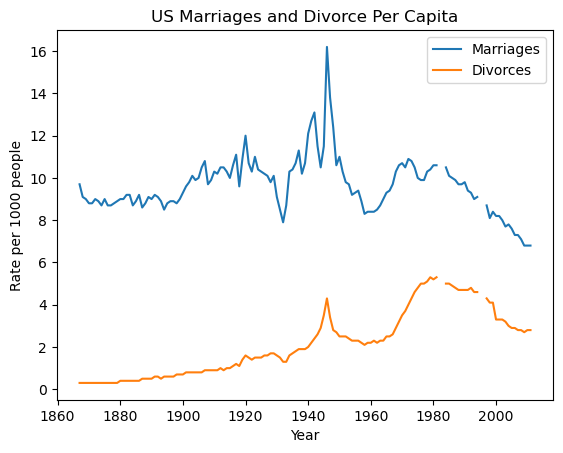

In [140]:
#Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
#Don't forget to label your axes!

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("us-marriages-divorces-1867-2014.csv")
df.sort_values('Year')

plt.plot(df['Year'], df['Marriages_per_1000'], label='Marriages')
plt.plot(df['Year'], df['Divorces_per_1000'], label='Divorces')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Rate per 1000 people')
plt.title('US Marriages and Divorce Per Capita')
plt.show()


## Question 7

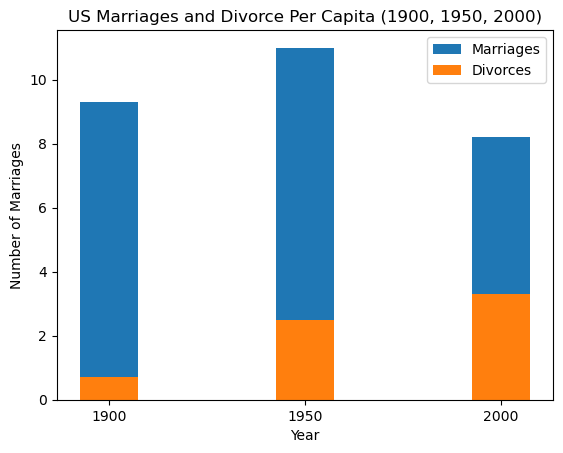

In [141]:
#Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
#Don't forget to label your axes!

df_selected = us_mar_div[['Year','Marriages_per_1000','Divorces_per_1000']]
val = df_selected.loc[df_selected.Year.isin([1900,1950,2000])]
val

Year = val['Year'].tolist()
Year_str = []
for x in Year:
    Year_str.append(str(x))

Marriages = val['Marriages_per_1000'].tolist()
Divorces = val['Divorces_per_1000'].tolist()

plt.bar(Year_str,Marriages,0.3,label="Marriages")
plt.bar(Year_str,Divorces,0.3,label="Divorces")
       
plt.xlabel("Year")
plt.ylabel("Number of Marriages")
plt.title('US Marriages and Divorce Per Capita (1900, 1950, 2000)')
plt.legend()
plt.show()

 ## Question 8

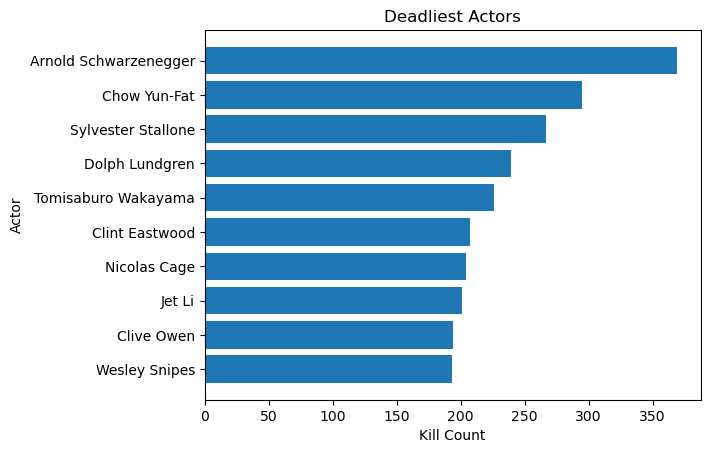

In [144]:
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name. Don't forget to label your axes!

kill_counts = pd.read_csv("actor_kill_counts.csv")
kill_counts_sorted = kill_counts.sort_values('Count',ascending = True)
kill_counts_sorted

plt.barh(kill_counts_sorted['Actor'],kill_counts_sorted['Count'])
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors')
plt.show()

## Question 9

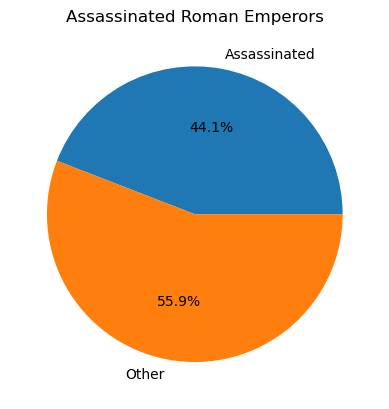

In [146]:
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
#Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

emperors_df = pd.read_csv("roman-emperor-reigns.csv")

# assassinated emperors
assassinated_count = emperors_df[emperors_df["Cause_of_Death"].str.contains("assassinated", case=False)].shape[0]

# not assassinated
other_count = emperors_df.shape[0] - assassinated_count

plt.pie([assassinated_count, other_count], labels=["Assassinated", "Other"], autopct="%1.1f%%")
plt.title("Assassinated Roman Emperors")

plt.show()



## Question 10

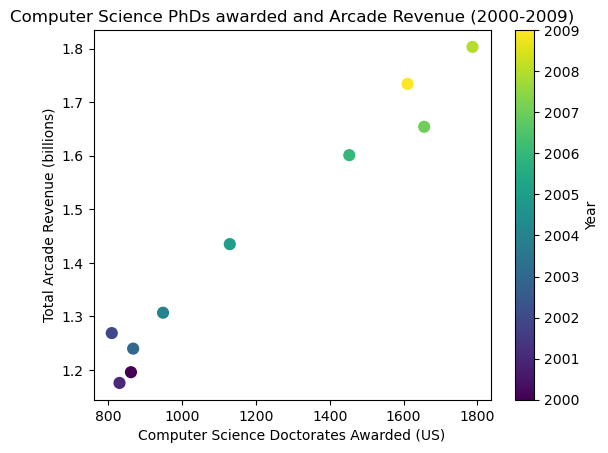

In [157]:
#Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
#Don't forget to label your axes!
#Color each dot according to its year.

revenue = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")
revenue

fig, ax = plt.subplots()
revenue.plot.scatter(x = 'Computer Science Doctorates Awarded (US)', y = 'Total Arcade Revenue (billions)',s=60,c = 'Year',colormap='viridis',ax=ax)
ax.set_title('Computer Science PhDs awarded and Arcade Revenue (2000-2009)')

# Show the plot
plt.show()